In [136]:
%matplotlib inline
from fastai import *
import torch
from matplotlib import pyplot as plt

In [137]:
n=100
x = torch.ones(n,2)
x[:,0] = x[:,0].uniform_(-1,1)

# creating x and y (ground truth data)
a = torch.tensor([2.,5.])
y_true = x@a + torch.rand(n)

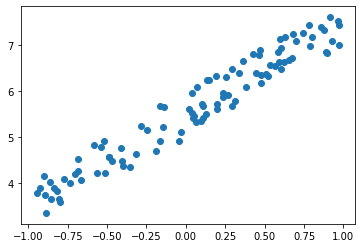

In [138]:
plt.scatter(x[:,0], y_true);

In [139]:
x[:5]

tensor([[0.3373, 1.0000],
        [0.5853, 1.0000],
        [0.2943, 1.0000],
        [0.9248, 1.0000],
        [0.2370, 1.0000]])

In [140]:
y_true[:5]

tensor([6.3845, 6.8410, 6.4659, 7.0772, 5.9530])

In [141]:
def mse(y_pred, y_true): 
    return ((y_pred-y_true)**2).mean()

In [148]:
w = torch.tensor([-1.,1],requires_grad=True)
w

tensor([-1.,  1.], requires_grad=True)

In [149]:
y_pred = x@w

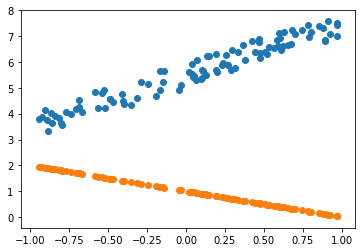

In [150]:
plt.scatter(x[:,0], y_true);
plt.scatter(x[:,0], y_pred.detach());

Batch gradient descent computes the gradient using the whole dataset. This is great for convex, or relatively smooth error manifolds. In this case, we move somewhat directly towards an optimum solution, either local or global. Additionally, batch gradient descent, given an annealed learning rate, will eventually find the minimum located in it's basin of attraction.

Stochastic gradient descent (SGD) computes the gradient using a single sample. Most applications of SGD actually use a minibatch of several samples, for reasons that will be explained a bit later. SGD works well (Not well, I suppose, but better than batch gradient descent) for error manifolds that have lots of local maxima/minima. In this case, the somewhat noisier gradient calculated using the reduced number of samples tends to jerk the model out of local minima into a region that hopefully is more optimal. Single samples are really noisy, while minibatches tend to average a little of the noise out. Thus, the amount of jerk is reduced when using minibatches. A good balance is struck when the minibatch size is small enough to avoid some of the poor local minima, but large enough that it doesn't avoid the global minima or better-performing local minima. (Incidently, this assumes that the best minima have a larger and deeper basin of attraction, and are therefore easier to fall into.)

In [156]:
#batch gradient descent
print (w)
def update():
    y_pred  = x@w
    loss = mse(y_pred,y_true)
    loss.backward()
    with torch.no_grad():
        w[0] = w[0] - lr* w.grad[0]
        w[1] = w[1] - lr* w.grad[1]
        #w.sub_(lr * w.grad)
        w.grad.zero_()
        if t%10==0:
            print(loss)
    

tensor([1.9857, 5.5183], requires_grad=True)


In [157]:
lr = 1e-1
for t in range(100): 
    update()
print (w)    

tensor(0.0785, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)
tensor(0.0785, grad_fn=<MeanBackward0>)
tensor([1.9864, 5.5151], requires_grad=True)


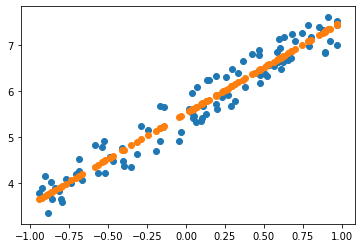

In [158]:
plt.scatter(x[:,0], y_true);
plt.scatter(x[:,0], x@w.detach());